### Exercise 1: Dilation
- Goal: Implement the dilation operator .

- Theory:
Dilation "grows" the bright regions of an image. 
For a grayscale image, the value of a pixel in the output is the maximum value of all pixels in the neighborhood defined by the structuring element (SE) .

$$\delta_{SE}(f)(x) = \max_{p \in SE} f(x+p)$$

Implementation:

We iterate over the image, extract the window defined by the SE, and assign the maximum value found in that window (masked by the SE) to the center pixel.

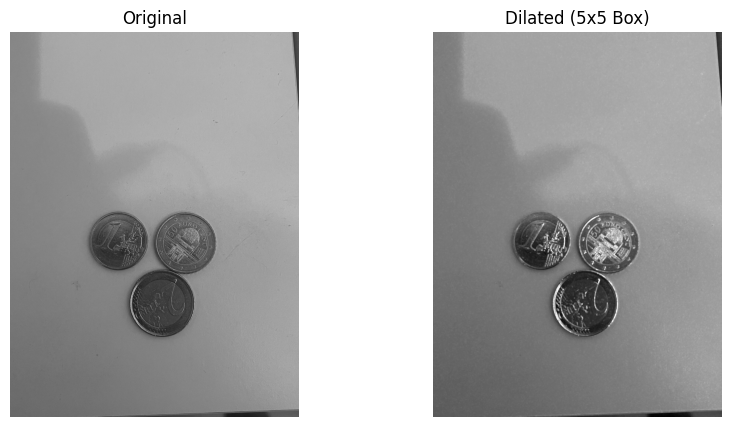

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dilation(image, struct_elem):
    """
    Implements Morphological Dilation (Exercise 1).
    Arguments:
        image: 2D numpy array (grayscale)
        struct_elem: 2D numpy array (binary mask, typically odd size)
    """
    h, w = image.shape
    sh, sw = struct_elem.shape
    
    # Calculate padding
    pad_h = sh // 2
    pad_w = sw // 2
    
    # Pad image with zeros (min possible value) so edges don't affect the max
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    
    output_image = np.zeros((h, w), dtype=np.uint8)
    
    # Iterate through pixels
    for i in range(h):
        for j in range(w):
            # Extract ROI
            region = padded_image[i:i+sh, j:j+sw]
            
            # Apply structuring element
            # We strictly consider pixels where the SE is 1
            masked_region = region[struct_elem == 1]
            
            # Find max
            if masked_region.size > 0:
                output_image[i, j] = np.max(masked_region)
                
    return output_image

# --- Test ---
img = cv2.imread('img/coins.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    # Synthetic image if file not found
    img = np.zeros((200, 200), dtype=np.uint8)
    cv2.putText(img, 'IoT', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, 255, 5)

# Define a Structuring Element (5x5 Box)
se_box = np.ones((5, 5), dtype=np.uint8)

# Apply Dilation
dilated_img = dilation(img, se_box)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Dilated (5x5 Box)")
plt.imshow(dilated_img, cmap='gray')
plt.axis('off')

plt.show()

### Exercise 2: Erosion
- Goal: Implement the erosion operator .
- Theory:
Erosion "shrinks" the bright regions of an image. It is the dual of dilation. For a grayscale image, the value of a pixel in the output is the minimum value of all pixels in the neighborhood defined by the structuring element (SE) .

$$\epsilon_{SE}(f)(x) = \min_{p \in SE} f(x+p)$$

Implementation:

Unlike dilation, where we padded with 0 (min value), for erosion we must pad with the maximum possible value (e.g., 255 for uint8) or replicate the border. If we pad with 0, the border zeros will "erode" into the image, darkening the edges artificially.

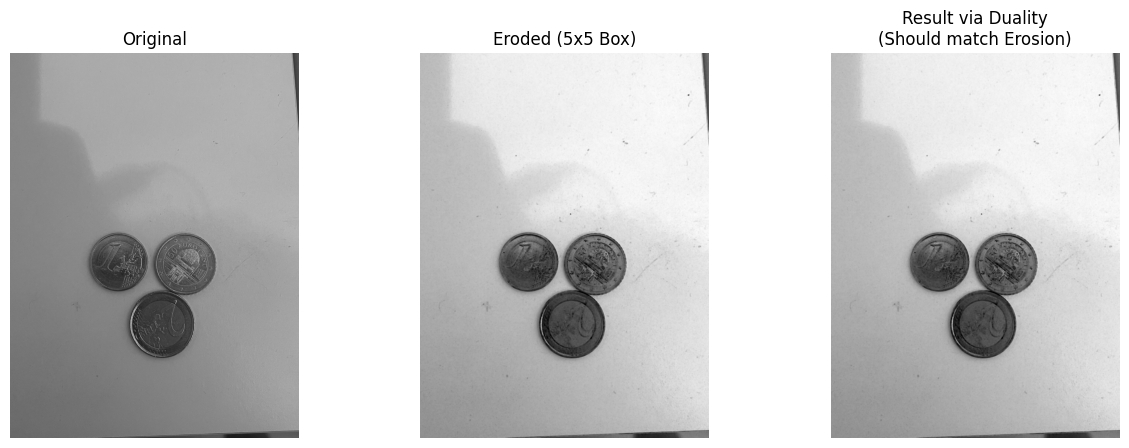

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def erosion(image, struct_elem):
    """
    Implements Morphological Erosion (Exercise 2).
    Arguments:
        image: 2D numpy array (grayscale)
        struct_elem: 2D numpy array (binary mask)
    """
    h, w = image.shape
    sh, sw = struct_elem.shape
    
    pad_h = sh // 2
    pad_w = sw // 2
    
    # Pad image with MAX value (255) so edges don't affect the min
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=255)
    
    output_image = np.zeros((h, w), dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+sh, j:j+sw]
            
            # Mask
            masked_region = region[struct_elem == 1]
            
            if masked_region.size > 0:
                output_image[i, j] = np.min(masked_region)
                
    return output_image

# --- Test ---
# Reuse 'img' from previous step
# Define a 5x5 Box Structuring Element
se_box = np.ones((5, 5), dtype=np.uint8)

# Apply Erosion
eroded_img = erosion(img, se_box)

# Verify Duality (Optional check mentioned in PDF [cite: 410-412])
# Erosion(f) should be similar to Invert(Dilation(Invert(f)))
inv_img = 255 - img
# Note: We need to make sure 'dilation' is defined in your scope
from_duality = 255 - dilation(inv_img, se_box)

# Display
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Eroded (5x5 Box)")
plt.imshow(eroded_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Result via Duality\n(Should match Erosion)")
plt.imshow(from_duality, cmap='gray')
plt.axis('off')

plt.show()

### Exercises 3 & 4: Opening and Closing
- Goal: Implement Opening (Ouverture) and Closing (Fermeture).

- Theory:These are simply compound operations built from the Dilation and Erosion functions you just wrote.
    - Closing ($\phi_{SE}$): Dilation followed by Erosion.
        - Effect: Fills small dark holes (pepper noise) and connects close objects.
    - Opening ($\gamma_{SE}$): Erosion followed by Dilation.
        - Effect: Removes small bright spots (salt noise) and disconnects objects connected by thin bridges.

Computing Opening... (this might take ~30s)
Computing Closing... (this might take ~30s)


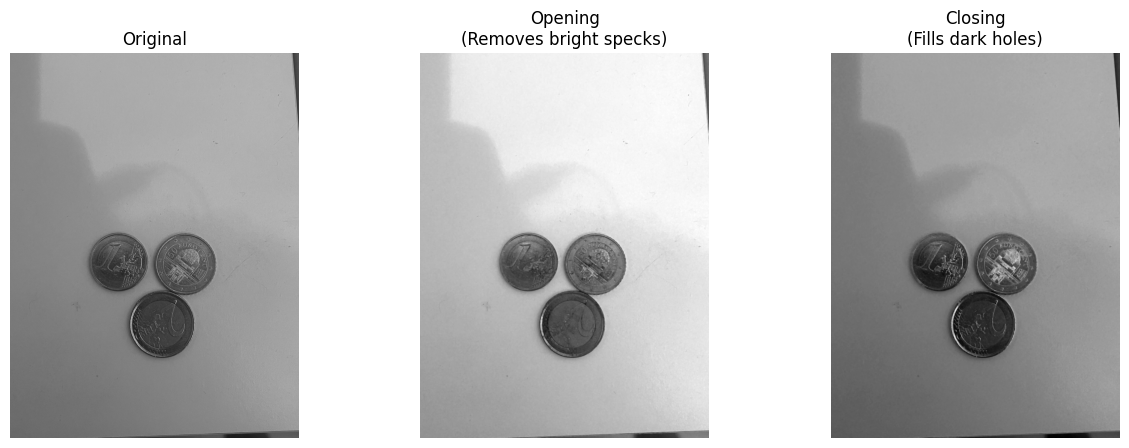

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# assume 'dilation' and 'erosion' are defined from previous cells.

def closing(image, struct_elem):
    """
    Implements Morphological Closing (Exercise 3).
    Formula: Erosion(Dilation(f))
    """
    # Step 1: Dilation
    dilated = dilation(image, struct_elem)
    # Step 2: Erosion of the result
    closed = erosion(dilated, struct_elem)
    return closed

def opening(image, struct_elem):
    """
    Implements Morphological Opening (Exercise 4).
    Formula: Dilation(Erosion(f))
    """
    # Step 1: Erosion
    eroded = erosion(image, struct_elem)
    # Step 2: Dilation of the result
    opened = dilation(eroded, struct_elem)
    return opened

# --- Test ---
img = cv2.imread('img/coins.png', cv2.IMREAD_GRAYSCALE)

# We use a slightly smaller kernel to be faster, but 5x5 is fine
se_box = np.ones((5, 5), dtype=np.uint8)

print("Computing Opening... (this might take ~30s)")
opened_img = opening(img, se_box)

print("Computing Closing... (this might take ~30s)")
closed_img = closing(img, se_box)

# Display
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Opening\n(Removes bright specks)")
plt.imshow(opened_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Closing\n(Fills dark holes)")
plt.imshow(closed_img, cmap='gray')
plt.axis('off')

plt.show()

### Exercise 5: Morphological Gradient
- Goal: Implement the Morphological Gradient .

- Theory:
The morphological gradient highlights transitions in intensity (edges). It is defined as the difference between the dilation and the erosion of the image by the same structuring element .

$$\text{Gradient}(f) = \delta_{SE}(f) - \epsilon_{SE}(f)$$

Since dilation computes the local maximum and erosion computes the local minimum, their difference represents the local contrast (max - min) within the neighborhood defined by the structuring element.

Computing Morphological Gradient...


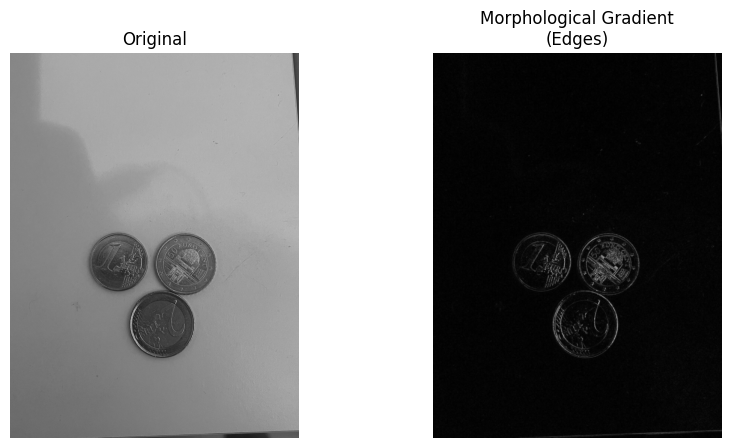

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# reuse 'dilation' and 'erosion' from previous cells

def morphological_gradient(image, struct_elem):
    """
    Implements the Morphological Gradient (Exercise 5).
    Formula: Dilation(f) - Erosion(f)
    """
    # 1. Compute Dilation
    dilated = dilation(image, struct_elem)
    
    # 2. Compute Erosion
    eroded = erosion(image, struct_elem)
    
    # 3. Compute Difference
    # We use cv2.subtract or convert to int to avoid uint8 underflow issues, 
    # though mathematically dilation >= erosion, so standard subtraction is safe here.
    gradient = cv2.subtract(dilated, eroded)
    
    return gradient

# --- Test ---
img = cv2.imread('img/coins.png', cv2.IMREAD_GRAYSCALE)

# A 3x3 structuring element usually gives thinner, sharper edges than 5x5
se_cross = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]], dtype=np.uint8)

print("Computing Morphological Gradient...")
morph_grad = morphological_gradient(img, se_cross)

# For comparison, let's load a standard Sobel result if you ran TP3, 
# or just display this result.

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Morphological Gradient\n(Edges)")
plt.imshow(morph_grad, cmap='gray')
plt.axis('off')

plt.show()